In [5]:
# Task 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier  # You can change algorithm later


In [7]:
# Task 2: Load Dataset
data = pd.read_csv("student_performance.csv")  # Replace with your dataset path
print("✅ Dataset Loaded Successfully!")

# Display first 5 rows
display(data.head())

# Dataset information
print("\nDataset Info:")
print(data.info())

# Check missing values
print("\nMissing Values:\n", data.isnull().sum())

✅ Dataset Loaded Successfully!


,Gender,Age,Study_Hours,Attendance,Previous_Grade,Parental_Education,Internet_Access,Final_Result
0,male,17,3,85,75,high_school,yes,pass
1,female,16,2,70,60,university,no,fail
2,male,18,4,90,80,university,yes,pass
3,female,17,3,88,78,high_school,yes,pass
4,male,16,1,60,50,high_school,no,fail



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              20 non-null     object
 1   Age                 20 non-null     int64 
 2   Study_Hours         20 non-null     int64 
 3   Attendance          20 non-null     int64 
 4   Previous_Grade      20 non-null     int64 
 5   Parental_Education  20 non-null     object
 6   Internet_Access     20 non-null     object
 7   Final_Result        20 non-null     object
dtypes: int64(4), object(4)
memory usage: 1.4+ KB
None

Missing Values:
 Gender                0
Age                   0
Study_Hours           0
Attendance            0
Previous_Grade        0
Parental_Education    0
Internet_Access       0
Final_Result          0
dtype: int64


In [8]:
# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
label_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_enc.fit_transform(data[col])

# Feature scaling (optional but recommended)
scaler = StandardScaler()
num_cols = ['Age', 'Study_Hours', 'Attendance', 'Previous_Grade']
data[num_cols] = scaler.fit_transform(data[num_cols])

print("✅ Data Preprocessing Completed!")
display(data.head())

✅ Data Preprocessing Completed!


,Gender,Age,Study_Hours,Attendance,Previous_Grade,Parental_Education,Internet_Access,Final_Result
0,1,-0.067574,0.125546,0.478293,0.460202,1,1,1
1,0,-1.419048,-0.711428,-0.814390,-0.806410,2,0,0
2,1,1.283901,0.962520,0.909187,0.882407,2,1,1
3,0,-0.067574,0.125546,0.736829,0.713525,1,1,1
4,1,-1.419048,-1.548402,-1.676179,-1.650818,1,0,0


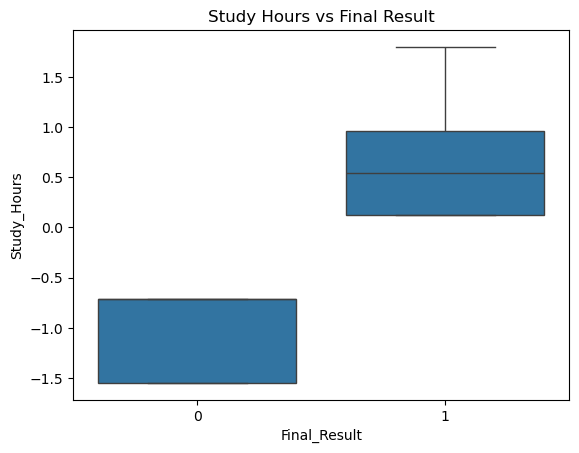

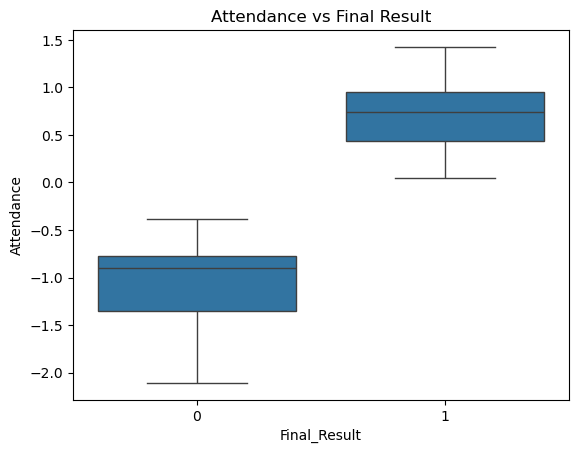

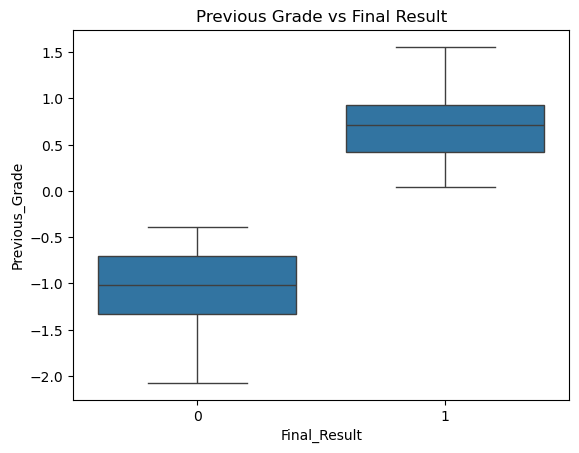

In [9]:
# Study hours vs Final Result
sns.boxplot(x="Final_Result", y="Study_Hours", data=data)
plt.title("Study Hours vs Final Result")
plt.show()

# Attendance vs Final Result
sns.boxplot(x="Final_Result", y="Attendance", data=data)
plt.title("Attendance vs Final Result")
plt.show()

# Previous Grade vs Final Result
sns.boxplot(x="Final_Result", y="Previous_Grade", data=data)
plt.title("Previous Grade vs Final Result")
plt.show()

In [10]:
X = data.drop("Final_Result", axis=1)
y = data["Final_Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (16, 7)
Testing Set: (4, 7)


In [11]:
# You can change model to: RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), etc.
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("✅ Model Trained Successfully!")

✅ Model Trained Successfully!


🔍 Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



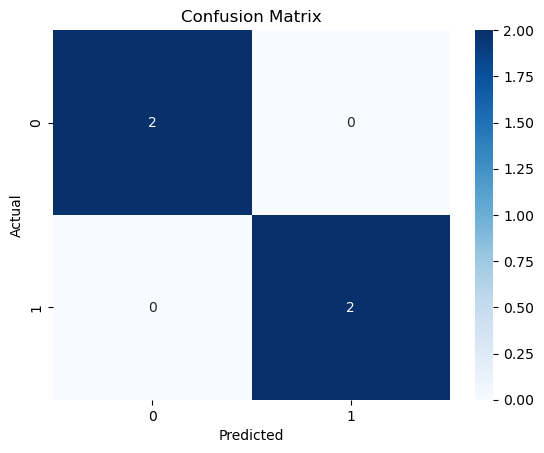

In [12]:
y_pred = model.predict(X_test)

print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
# Example new student data (values should match column order)
new_student = pd.DataFrame({
    'Gender': [1],
    'Age': [17],
    'Study_Hours': [2],
    'Attendance': [80],
    'Previous_Grade': [70],
    'Parental_Education': [2],
    'Internet_Access': [1]
})

# Scale numeric data (using same scaler)
new_student[num_cols] = scaler.transform(new_student[num_cols])

prediction = model.predict(new_student)
result = "Pass" if prediction[0] == 1 else "Fail"

print("🎓 Predicted Result for New Student:", result)

🎓 Predicted Result for New Student: Pass


In [15]:
print("📄 PROJECT SUMMARY")
print("-------------------")
print("Objective: Predict student performance using ML")
print("Dataset: Student Performance CSV (custom or UCI)")
print("Algorithm Used: Decision Tree Classifier")
print("Accuracy Achieved:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("Insights: Study hours, attendance, and previous grades are key performance indicators.")


📄 PROJECT SUMMARY
-------------------
Objective: Predict student performance using ML
Dataset: Student Performance CSV (custom or UCI)
Algorithm Used: Decision Tree Classifier
Accuracy Achieved: 100.0 %
Insights: Study hours, attendance, and previous grades are key performance indicators.
